# Курс 
https://machinelearningmastery.com/how-to-get-started-with-deep-learning-for-computer-vision-7-day-mini-course/

In [23]:
import tensorflow as tf

In [4]:
tf.__version__

'2.3.1'

# Lesson 2

In [6]:
from numpy import asarray
from PIL import Image

In [10]:
image= Image.open('/home/konstantin/cv/computer_vision/Part_2/image/bondi_beach.jpg')

In [17]:
pixels = asarray(image)
print(pixels.dtype)

uint8


In [18]:
print("max: %.3f, min: %.3f" % (pixels.min(), pixels.max()))

max: 0.000, min: 255.000


In [19]:
pixels =pixels.astype('float32')
pixels /= 255.0

In [20]:
print("max: %.3f, min: %.3f" % (pixels.min(), pixels.max()))

max: 0.000, min: 1.000


# Lesson 3

In [22]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten, Dense

In [5]:
model = tf.keras.models.Sequential()
model.add(Conv2D(32, (3,3), input_shape=(256,256,1)))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 516128)            0         
_________________________________________________________________
dense (Dense)                (None, 1)                 516129    
Total params: 516,449
Trainable params: 516,449
Non-trainable params: 0
_________________________________________________________________


# Lesson 4. 
Классификация изображений с использованием предобученной сети.

In [6]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions, VGG16

In [15]:
image = load_img('/home/konstantin/cv/computer_vision/Part_2/image/dog.jpg', target_size=(244,244))
print('original', image)
image = img_to_array(image)
print('after array', image)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
print('after reshape',image)
image = preprocess_input(image)
print('after prepros', image)

original <PIL.Image.Image image mode=RGB size=244x244 at 0x7F62BC1C4D68>
after array [[[200. 184. 158.]
  [237. 221. 188.]
  [200. 177. 161.]
  ...
  [230. 216. 179.]
  [248. 230. 194.]
  [229. 209. 174.]]

 [[201. 189. 165.]
  [210. 195. 164.]
  [207. 185. 171.]
  ...
  [221. 212. 173.]
  [231. 217. 180.]
  [228. 210. 174.]]

 [[233. 222. 200.]
  [200. 189. 161.]
  [174. 156. 144.]
  ...
  [204. 196. 157.]
  [234. 222. 184.]
  [210. 196. 159.]]

 ...

 [[172. 142. 140.]
  [205. 168. 159.]
  [224. 203. 172.]
  ...
  [216. 200. 175.]
  [178. 163. 134.]
  [180. 165. 134.]]

 [[149. 137. 115.]
  [170. 138. 125.]
  [202. 166. 154.]
  ...
  [208. 192. 167.]
  [181. 166. 137.]
  [224. 209. 178.]]

 [[103.  96.  68.]
  [139. 107.  92.]
  [179. 136. 130.]
  ...
  [205. 189. 164.]
  [182. 167. 138.]
  [173. 158. 127.]]]
after reshape [[[[200. 184. 158.]
   [237. 221. 188.]
   [200. 177. 161.]
   ...
   [230. 216. 179.]
   [248. 230. 194.]
   [229. 209. 174.]]

  [[201. 189. 165.]
   [210. 195. 

In [12]:
model = VGG16()

553467904/553467096 [==============================] - 72s 0us/step


In [17]:
yhat = model.predict(image)
label = decode_predictions(yhat)
print('LABEL', label)
label = label[0][0]
print(label, label)

LABEL [[('n02107142', 'Doberman', 0.2966604), ('n02089078', 'black-and-tan_coonhound', 0.23130743), ('n02105412', 'kelpie', 0.1488827), ('n02106550', 'Rottweiler', 0.12011155), ('n02107312', 'miniature_pinscher', 0.056879703)]]
('n02107142', 'Doberman', 0.2966604) ('n02107142', 'Doberman', 0.2966604)


In [18]:
print('%s (%.2f%%)' % (label[1], label[2]*100))

Doberman (29.67%)


In [20]:
image = load_img('/home/konstantin/cv/computer_vision/Part_2/image/collie_dog.jpg', target_size=(244,244))
image = img_to_array(image)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image = preprocess_input(image)

In [21]:
yhat = model.predict(image)
label = decode_predictions(yhat)
label = label[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))

collie (97.17%)


In [22]:
path = '/home/konstantin/cv/computer_vision/Part_2/image/cerbernar.jpg'
image = load_img(path, target_size=(244,244))
image = img_to_array(image)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image = preprocess_input(image)
yhat = model.predict(image)
label = decode_predictions(yhat)
label = label[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))

Saint_Bernard (99.67%)


# Lesson 5.
Тренировка сети на наборе данных "Fashion-MNIST"

In [23]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense

In [25]:
(trainX, trainY), (testX, testY) = fashion_mnist.load_data()
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))
trainX, testX = trainX.astype('float32'), testX.astype('float32')
trainX, testX = trainX/255.0, testX/255.0

trainY, testY = to_categorical(trainY), to_categorical(testY)

In [30]:
model= Sequential()
model.add(Conv2D(32, (3,3), input_shape=(28,28,1)))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3)))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               160100    
_________________________________________________________________
dense_6 (Dense)              (None, 10)               

In [31]:
model.compile(optimizer='adam', loss='categorical_crossentropy',
             metrics=['accuracy'])
model.fit(trainX, trainY, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4456 - accuracy: 0.8391
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3006 - accuracy: 0.8909
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2540 - accuracy: 0.9059
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2172 - accuracy: 0.9201
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1874 - accuracy: 0.9303
Epoch 6/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1606 - accuracy: 0.9395
Epoch 7/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1374 - accuracy: 0.9480
Epoch 8/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1168 - accuracy: 0.9560
Epoch 9/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1002 - accuracy: 0.9628
Epoch 10/10
1875/1875 [==============================] - 14s 7ms/step - l

In [32]:
loss, acc = model.evaluate(testX, testY)
print('loss = %.3f, accuracy = %.3f' % (loss, acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.3797 - accuracy: 0.9037
loss = 0.380, accuracy = 0.904


In [38]:
model2 = Sequential()
model2.add(Conv2D(32, (3,3), activation='relu',
                  kernel_initializer='he_uniform',input_shape=(28,28,1)))
model2.add(MaxPooling2D())
model2.add(Flatten())
model2.add(Dense(100, activation='relu'))
model2.add(Dense(10, activation='softmax'))
model2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 100)               540900    
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________


In [39]:
model2.compile(optimizer='adam', loss='categorical_crossentropy',
             metrics=['accuracy'])
model2.fit(trainX, trainY, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3738 - accuracy: 0.8669
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2509 - accuracy: 0.9084
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2095 - accuracy: 0.9240
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1785 - accuracy: 0.9336
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1527 - accuracy: 0.9443
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1327 - accuracy: 0.9501
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1130 - accuracy: 0.9577
Epoch 8/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0970 - accuracy: 0.9645
Epoch 9/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0821 - accuracy: 0.9697
Epoch 10/10
1875/1875 [==============================] - 12s 6ms/step - l

In [40]:
loss2, acc2 = model2.evaluate(testX, testY)
print('loss = %.3f, accuracy = %.3f' % (loss, acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.3302 - accuracy: 0.9106
loss = 0.380, accuracy = 0.904


# Lesson 6.
Аугментация данных

In [41]:
from numpy import expand_dims
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

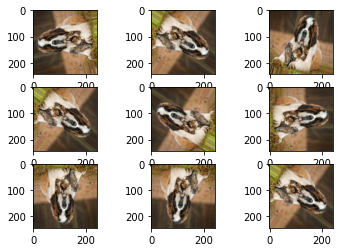

In [46]:
path = '/home/konstantin/cv/computer_vision/Part_2/image/cerbernar.jpg'
image = load_img(path, target_size=(244,244))
image = img_to_array(image)
samples = expand_dims(image, 0)
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True,
                            rotation_range=90)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
    plt.subplot(330+1+i)
    batch = it.next()
    image = batch[0].astype('uint32')
    plt.imshow(image)
plt.show()

# Lesson 7.
Детектирования лиц

In [1]:
!pip install mtcnn

     |████████████████████████████████| 2.3 MB 680 kB/s eta 0:00:01
     |████████████████████████████████| 269 kB 5.0 MB/s eta 0:00:01
  Created wheel for pyyaml: filename=PyYAML-5.3.1-cp36-cp36m-linux_x86_64.whl size=44619 sha256=a91f060218573b751bb8d6f6c951116f77cba6a444cf35682c90452adce60219
  Stored in directory: /home/konstantin/.cache/pip/wheels/e5/9d/ad/2ee53cf262cba1ffd8afe1487eef788ea3f260b7e6232a80fc
Successfully built pyyaml
You should consider upgrading via the '/home/konstantin/cv/cv/bin/python3 -m pip install --upgrade pip' command.


In [2]:
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from mtcnn.mtcnn import MTCNN

In [4]:
pixels = pyplot.imread('./image/street.jpg')

[{'box': [412, 108, 74, 92], 'confidence': 0.9999997615814209, 'keypoints': {'left_eye': (454, 140), 'right_eye': (483, 138), 'nose': (476, 161), 'mouth_left': (453, 176), 'mouth_right': (476, 175)}}]


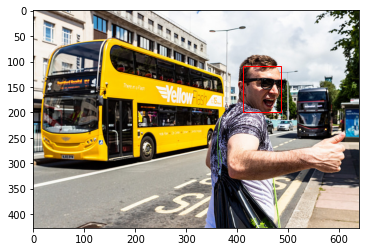

In [6]:
detector = MTCNN()
faces = detector.detect_faces(pixels)
pyplot.imshow(pixels)
print(faces)
ax = pyplot.gca()
x, y, width, height = faces[0]['box']
rect = Rectangle((x,y), width, height, fill=False, color='red')
ax.add_patch(rect)
pyplot.show()

In [17]:
print(type(faces[0]))
print(len(faces[0]['box']))
faces[0]['keypoints']['mouth_left']

<class 'dict'>
4


(453, 176)

In [18]:
pixels = pyplot.imread('./image/people.jpg')
detector = MTCNN()
faces = detector.detect_faces(pixels)
print(faces)


[{'box': [1292, 764, 596, 847], 'confidence': 0.9999995231628418, 'keypoints': {'left_eye': (1507, 1101), 'right_eye': (1777, 1169), 'nose': (1621, 1347), 'mouth_left': (1422, 1350), 'mouth_right': (1697, 1422)}}, {'box': [2663, 595, 571, 783], 'confidence': 0.9999737739562988, 'keypoints': {'left_eye': (2820, 944), 'right_eye': (3074, 888), 'nose': (2973, 1082), 'mouth_left': (2851, 1152), 'mouth_right': (3139, 1106)}}, {'box': [1978, 878, 555, 660], 'confidence': 0.9997995495796204, 'keypoints': {'left_eye': (2117, 1152), 'right_eye': (2365, 1117), 'nose': (2241, 1244), 'mouth_left': (2139, 1360), 'mouth_right': (2415, 1323)}}, {'box': [293, 644, 635, 844], 'confidence': 0.9990540146827698, 'keypoints': {'left_eye': (467, 978), 'right_eye': (779, 987), 'nose': (620, 1146), 'mouth_left': (445, 1262), 'mouth_right': (776, 1271)}}, {'box': [3323, 845, 604, 638], 'confidence': 0.9975173473358154, 'keypoints': {'left_eye': (3464, 1128), 'right_eye': (3703, 1013), 'nose': (3599, 1184), 'mo

In [19]:
len(faces)

5

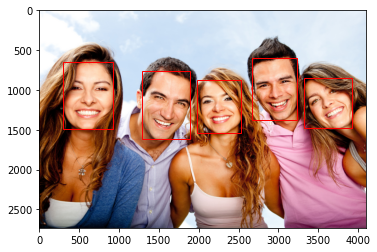

In [21]:
pyplot.imshow(pixels)
ax = pyplot.gca()
for i in range(len(faces)):
    x, y, width, height = faces[i]['box']
    rect = Rectangle((x,y), width, height, fill=False, color='red')
    ax.add_patch(rect)
pyplot.show()